<a href="https://colab.research.google.com/github/nhutd107/AI_CDT_20146509_-D.Nhu-/blob/main/DocHinhAnh_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from keras.datasets import mnist
from tensorflow.keras import models
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from keras.utils import to_categorical #để chuyển đổi một mảng số nguyên thành một ma trận one-hot encoding

(train_images,train_labels),(test_images,test_labels) = mnist.load_data()
train_images.shape  #xac dinh kich thuoc cua anh

11490434/11490434 [==============================] - 1s 0us/step


(60000, 28, 28)

so này là: 5


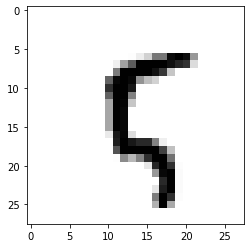

In [2]:
hinh = train_images[100]
plt.imshow(hinh,cmap = plt.cm.binary)
print('so này là:',train_labels[100])

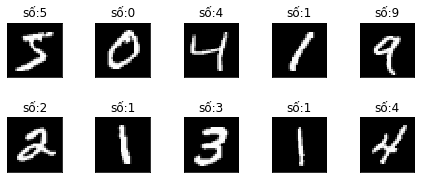

In [6]:
for i in range(10):
  plt.subplot(3,5,i+1)
  plt.tight_layout()

  plt.imshow(train_images[i],cmap = 'gray',interpolation='none')
  plt.title('số:{}'.format(train_labels[i]))

  plt.xticks([])
  plt.yticks([])


In [7]:
model = models.Sequential()
model.add(layers.Dense(512, input_shape=(28*28,), activation='relu'))
model.add(layers.Dense(1, activation='linear', name='output_layer'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               401920    
                                                                 
 output_layer (Dense)        (None, 1)                 513       
                                                                 
Total params: 402,433
Trainable params: 402,433
Non-trainable params: 0
_________________________________________________________________


In [8]:
#anh 2 chieu  
#train nó

train_images = train_images.reshape((60000,28*28))
train_image = train_images.astype('float32')/255  #chuyen anh ve float 32
test_images = test_images.reshape((10000,28*28))
test_image = test_images.astype('float32')/255 


from keras.utils import to_categorical #để chuyển đổi một mảng số nguyên thành một ma trận one-hot encoding
train_label = to_categorical(train_labels,10)  # chuyển thanh 10 cột
test_labels = to_categorical(train_labels,10)
print(train_label[i])

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


In [ ]:
# Biên dịch mô hình
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
#huan luyen mo hinh
model.fit(train_images, train_labels, epochs=10, batch_size=128)

#đánh giá độ chính xác
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('test_accuracy: ',test_acc)
print('test_loss: ',test_loss)